# Exploratory Data Analysis - Finance

This data project focuses on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

___

## Getting Data from Online Sources
___

<big>We will get the data using <b>pandas datareader</b></big>.
<br><br><br>
<big>We will get stock information for the following banks</big>:

- Bank of America (ticker : BAC)
- CitiGroup (ticker : C)
- Goldman Sachs (ticker : GS)
- JPMorgan Chase (ticker : JPM)
- Morgan Stanley (ticker : MS)
- Wells Fargo  Co. (ticker : WFC)


In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader as pdr    # To Read Stock information directly from internet

In [2]:
# Stocks taken under Consideration

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

stocks = ['Bank of America',
          'CitiGroup',
          'Goldman Sachs',
          'JP Morgan Chase',
          'Morgan Stanley',
          'Wells Fargo']

ticker_info = {'ticker' : tickers,
               'name' : stocks}

ticker_df = pd.DataFrame.from_dict(ticker_info).set_index('ticker')

ticker_df

,name
ticker,
BAC,Bank of America
C,CitiGroup
GS,Goldman Sachs
JPM,JP Morgan Chase
MS,Morgan Stanley
WFC,Wells Fargo


In [3]:
# Saving Ticker Info to a CSV

ticker_df.to_csv('ticker_info.csv')

In [4]:
# Fetching Data from Internet

start_date = dt.date(2006, 1, 1)
end_date = dt.date(2016, 1, 1)

stock_data = dict()

for tick in tickers:
    # Fetching Data
    stock_data[tick] = pdr.get_data_yahoo(tick, start_date, end_date)

    # or
    # stock_data[tick] = pdr.data.DataReader(tick, 'yahoo', start_date, end_date)
    
    # Adding the ticker symbol column to the recieved Data Set
    stock_data[tick]['ticker'] = tick

In [5]:
# Joining (Concatenating) the data of all stock into a single DataFrame

bank_stocks = pd.concat(stock_data.values()).sort_index()    # Sorting by date (index)

bank_stocks.head(len(tickers))

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.280807,BAC
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.523809,WFC
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.364140,MS
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.663109,JPM
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,104.919411,GS
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,370.934509,C


In [6]:
# Rearranging Columns & Rounding off values to 2 decimal points

bank_stocks = bank_stocks.reset_index().set_index(['Date', 'ticker']).round(2)

bank_stocks.head(len(tickers))

High     Low    Open   Close      Volume  Adj Close
Date       ticker                                                       
2006-01-03 BAC      47.18   46.15   46.92   47.08  16296700.0      34.28
           WFC      31.98   31.19   31.60   31.90  11016400.0      20.52
           MS       58.49   56.74   57.17   58.31   5377000.0      36.36
           JPM      40.36   39.30   39.83   40.19  12838600.0      26.66
           GS      129.44  124.23  126.70  128.87   6188700.0     104.92
           C       493.80  481.10  490.00  492.90   1537600.0     370.93

In [7]:
bank_stocks.tail(len(tickers))

High     Low    Open   Close      Volume  Adj Close
Date       ticker                                                       
2015-12-31 GS      182.89  180.03  181.16  180.23   1773900.0     164.20
           JPM      66.78   66.00   66.19   66.03  14654300.0      56.30
           C        52.39   51.75   52.07   51.75  11281800.0      45.17
           BAC      17.07   16.83   17.01   16.83  47153000.0      15.11
           MS       32.30   31.77   31.91   31.81   8154300.0      27.65
           WFC      54.95   54.22   54.51   54.36  10929800.0      45.55

In [8]:
# Saving Data to a CSV file

bank_stocks.to_csv('./bank_stocks_data.csv')

## Basic Questions
___

### What is the maximum and minimum <code>Close</code> price for each bank's stock throughout the time period?

### Values

In [9]:
# Maximum Value for each stock during the period 

bank_stocks.groupby('ticker')['Close'].max()

ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
Name: Close, dtype: float64

In [10]:
# Minimum Value for each stock during the period

bank_stocks.groupby('ticker')['Close'].min()

ticker
BAC     3.14
C      10.20
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
Name: Close, dtype: float64

### Dates

In [11]:
df = bank_stocks.xs(key='Close', axis=1).unstack()

df.head()

ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.67


In [12]:
# Dates of Maximum Value for each stock during the period 

df.idxmax()

ticker
BAC   2006-11-16
C     2006-12-27
GS    2007-10-31
JPM   2015-07-22
MS    2007-06-14
WFC   2015-07-22
dtype: datetime64[ns]

In [13]:
# Dates of Minimum Value for each stock during the period 

df.idxmin()

ticker
BAC   2009-03-06
C     2009-03-05
GS    2008-11-20
JPM   2009-03-09
MS    2008-11-20
WFC   2009-03-05
dtype: datetime64[ns]

### Values With Dates

In [14]:
# Maximum Value : with Date

df_ = None

for tick in tickers:
    df_temp = df[df[tick] == df[tick].max()][[tick]]
    
    if df_ is None:
        df_ = df_temp
    else:
        df_ = pd.concat([df_, df_temp])

df_.stack()

Date        ticker
2006-11-16  BAC        54.90
2006-11-20  BAC        54.90
2006-12-27  C         564.10
2007-10-31  GS        247.92
2015-07-22  JPM        70.08
2007-06-14  MS         89.30
2015-07-22  WFC        58.52
dtype: float64

In [15]:
# Maximum Value : with Date

df_ = None

for tick in tickers:
    df_temp = df[df[tick] == df[tick].min()][[tick]]
    
    if df_ is None:
        df_ = df_temp
    else:
        df_ = pd.concat([df_, df_temp])

df_.stack()

Date        ticker
2009-03-06  BAC        3.14
2009-03-05  C         10.20
2008-11-20  GS        52.00
2009-03-09  JPM       15.90
2008-11-20  MS         9.20
2009-03-05  WFC        8.12
dtype: float64

## Plotting Closing values over time period
___

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
sns.set_context('talk')

In [17]:
import cufflinks as cfl

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

cfl.go_offline()

In [18]:
# Interactive Plot

df.iplot()

<AxesSubplot:xlabel='Date'>

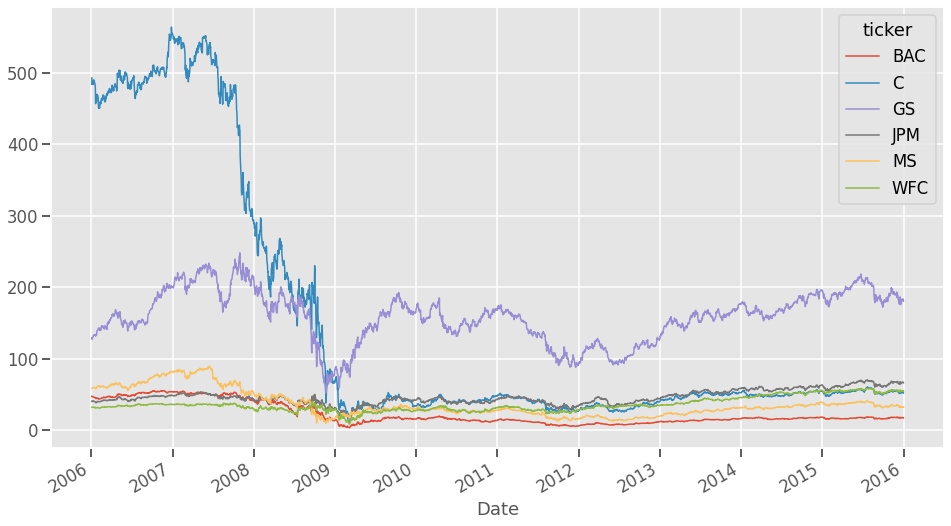

In [19]:
# Static Plot 1

df.plot(figsize=(16, 9), lw=1.5)

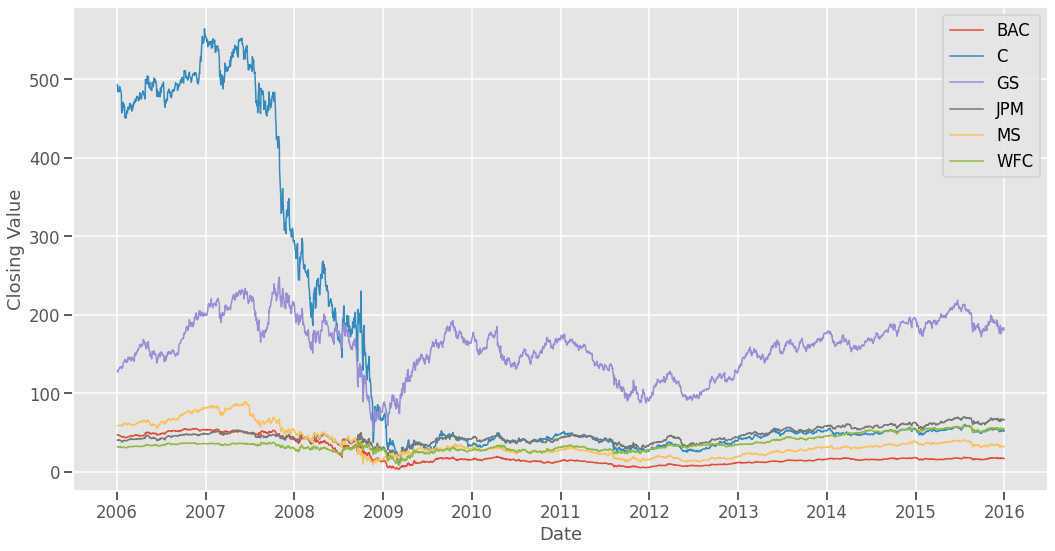

In [20]:
# Static Plot 2

plt.figure(figsize=(15,8))

for tick in tickers:
    sns.lineplot(data=df, x='Date', y=tick,
                 palette='Dark2', lw=1.5, label=tick)

plt.ylabel('Closing Value')
plt.legend()
plt.tight_layout()

## Returns for each stock over time period

We will calculate the percentage change on the daily <code>Close</code> value

In [21]:
returns = df.pct_change()

returns.head()

ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


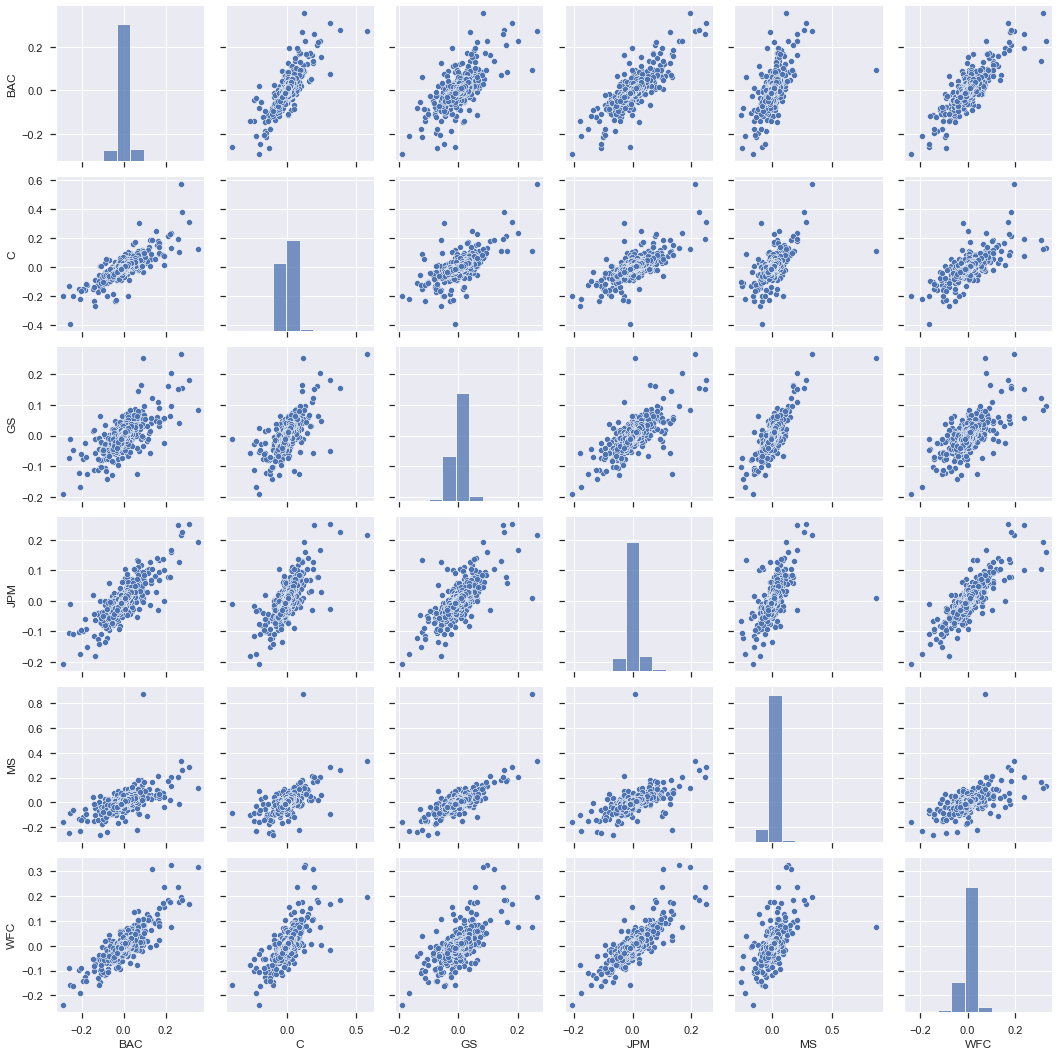

In [22]:
plt.style.use('seaborn')
sns.set_context('notebook')

g = sns.PairGrid(returns)

g.map_diag(sns.histplot, bins=10)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)

### What was Highest Gain and Highest Loss for each bank stock in a single day during the time period? 

(in percentage)

### Values

In [23]:
# Highest Gain in a single day

returns.max()

ticker
BAC    0.352691
C      0.578249
GS     0.264678
JPM    0.250967
MS     0.869835
WFC    0.327645
dtype: float64

In [24]:
# Highest Loss in a single day

returns.min()

ticker
BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.238223
dtype: float64

## Dates

In [25]:
# Dates for Highest Gain in a single day

returns.idxmax()

ticker
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [26]:
# Dates for Highest Loss in a single day

returns.idxmin()

ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

### Values with Dates

In [27]:
# Highest Gain in a single day : With Date

df_ = None

for tick in tickers:
    df_temp = returns[returns[tick] == returns[tick].max()][[tick]]

    if df_ is None:
        df_ = df_temp
    else:
        df_ = pd.concat([df_, df_temp])

df_ = df_.stack().reset_index().set_index('ticker')

df_.columns = ['Date', 'Highest Gain']

df_[['Highest Gain', 'Date']]

,Highest Gain,Date
ticker,,
BAC,0.352691,2009-04-09
C,0.578249,2008-11-24
GS,0.264678,2008-11-24
JPM,0.250967,2009-01-21
MS,0.869835,2008-10-13
WFC,0.327645,2008-07-16


In [28]:
# Highest Loss in a single day : With Date

df_ = None

for tick in tickers:
    df_temp = returns[returns[tick] == returns[tick].min()][[tick]]

    if df_ is None:
        df_ = df_temp
    else:
        df_ = pd.concat([df_, df_temp])

df_ = df_.stack().reset_index().set_index('ticker')

df_.columns = ['Date', 'Highest Loss']

df_[['Highest Loss', 'Date']]

,Highest Loss,Date
ticker,,
BAC,-0.289694,2009-01-20
C,-0.390244,2009-02-27
GS,-0.189596,2009-01-20
JPM,-0.207274,2009-01-20
MS,-0.258929,2008-10-09
WFC,-0.238223,2009-01-20


### What was riskiest and safest bank stock throughout the time period?

Riskiest means stock with highest <b>standard deviation</b>.

In [29]:
df_risk = returns.std()

df_risk

ticker
BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [30]:
# Riskiest

df_risk[df_risk==df_risk.max()]

ticker
C    0.038672
dtype: float64

In [31]:
# Riskiest

df_risk[df_risk==df_risk.min()]

ticker
GS    0.02539
dtype: float64

<big>in the Year <b>2015</b></big>

In [32]:
df_risk_2015 = returns.loc['2015-01-01':'2016-01-01'].std()

df_risk_2015

ticker
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

In [33]:
# Riskiest

df_risk_2015[df_risk_2015==df_risk_2015.max()]

ticker
MS    0.016249
dtype: float64

In [34]:
# Riskiest

df_risk_2015[df_risk_2015==df_risk_2015.min()]

ticker
WFC    0.012591
dtype: float64

## Plotting stock returns
___

In [35]:
sns.set_context('talk')

<big>Morgan Stanley (<b>MS</b>) for the year <b>2015</b>

Text(0.5, 0, 'MS return')

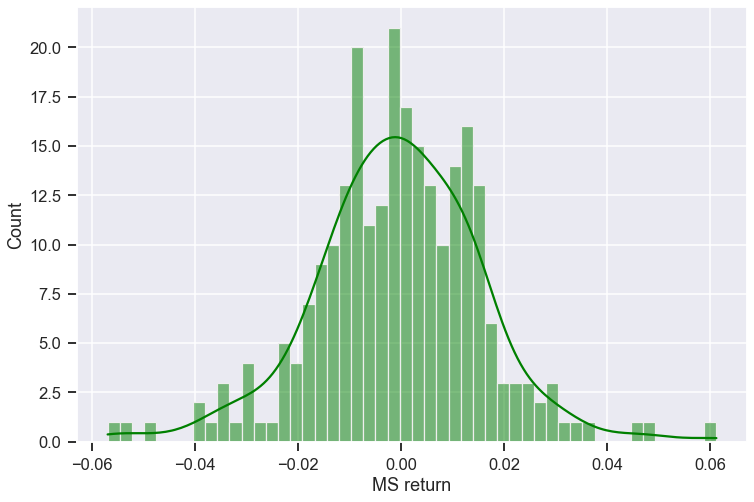

In [36]:
returns_MS_2015 = returns.loc['2015-01-01':'2016-01-01', 'MS']

plt.figure(figsize=(12, 8))
sns.histplot(returns_MS_2015, kde=True, bins=50, color='green')
plt.xlabel('MS return')

<big>CitiGroup (<b>C</b>) for the year <b>2008</b>

Text(0.5, 0, 'C return')

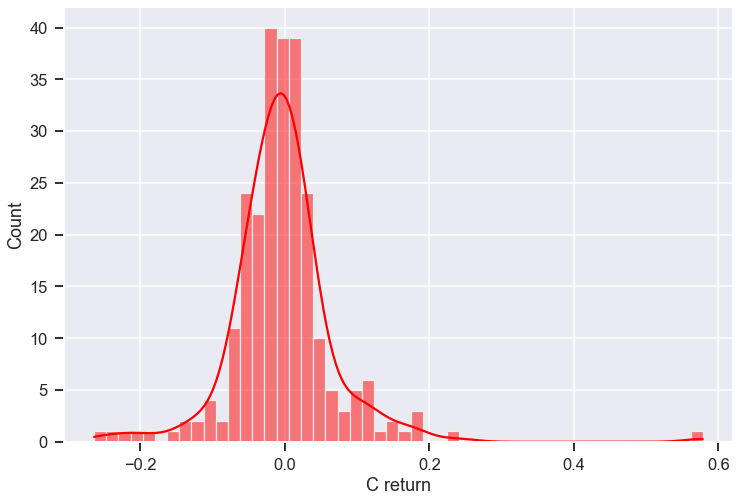

In [37]:
returns_c_2008 = returns.loc['2008-01-01':'2009-01-01', 'C']

plt.figure(figsize=(12, 8))
sns.histplot(returns_c_2008, kde=True, bins=50, color='red')
plt.xlabel('C return')

## Moving Averages
___

Let's analyze the moving averages for these stocks in the year <b>2008</b>.

### Plot -  Close Price <code>vs</code> 30 day Rolling Average - BAC - 2008

<AxesSubplot:xlabel='Date', ylabel='BAC'>

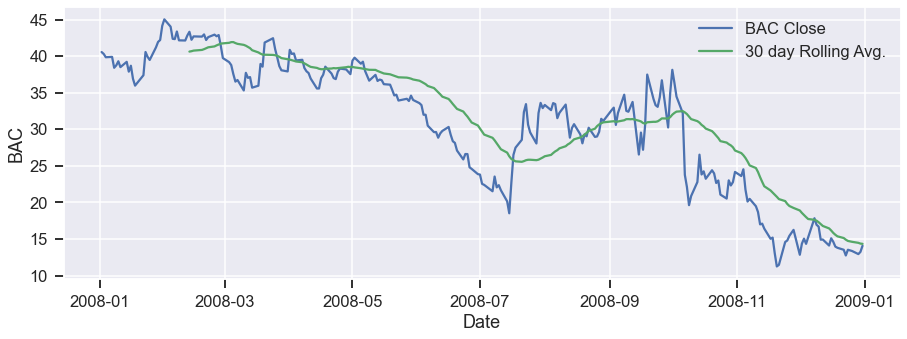

In [38]:
plt.figure(figsize=(15, 5))

df_ = df.loc["2008-01-01" : "2009-01-01", ['BAC']]

sns.lineplot(data=df_, x='Date', y='BAC', label='BAC Close')

sns.lineplot(data=df_.rolling(window=30).mean(), x='Date', y='BAC',  # 30 day Rolling Average
              label='30 day Rolling Avg.')

### Correlation between the stocks Close Price
___

In [39]:
df.corr()

ticker,BAC,C,GS,JPM,MS,WFC
ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008541
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068537
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131834
WFC,0.008541,-0.068537,0.499897,0.940269,0.131834,1.000000


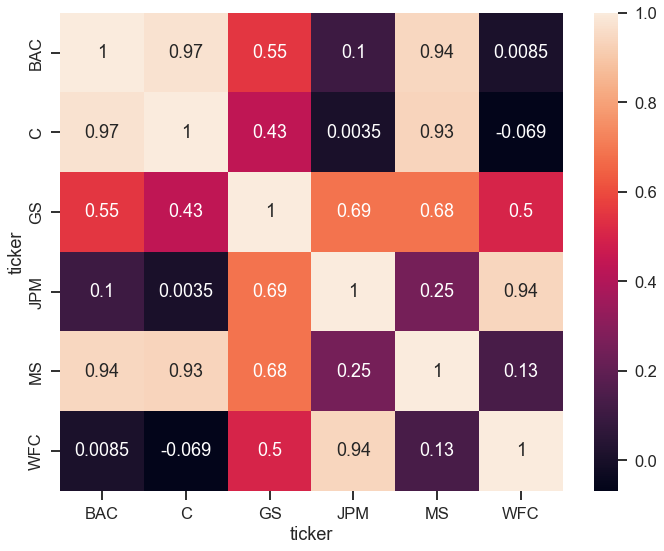

In [40]:
plt.figure(figsize=(10,8))

sns.heatmap(data=df.corr(), annot=True)

plt.tight_layout()

<Figure size 720x576 with 0 Axes>

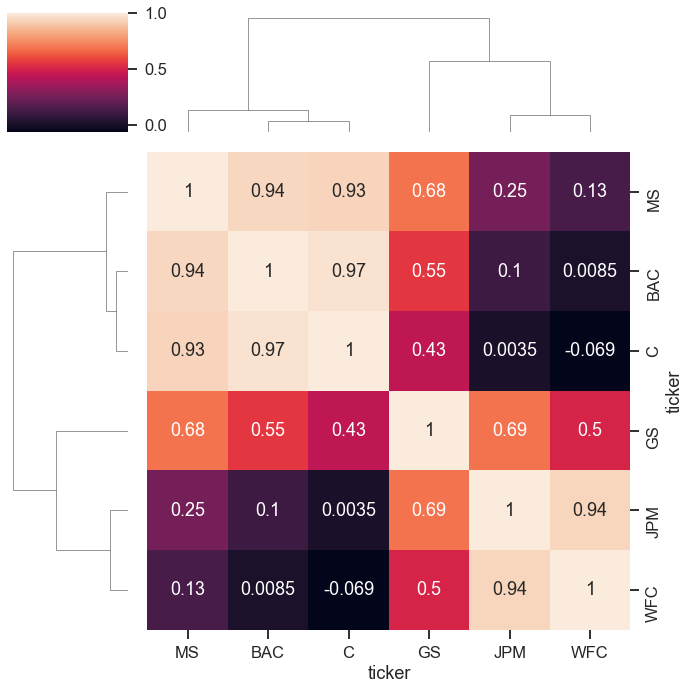

In [41]:
plt.figure(figsize=(10,8))

sns.clustermap(data=df.corr(), annot=True)

plt.tight_layout()

### Interactive Plots
___

- <big><b>Candle Plot</b> - Bank of America <code>BAC</code> - year 2015</big>

In [42]:
bac_2015 = bank_stocks.xs('BAC', axis=0, level=1).loc['2015-01-01' : '2016-01-01']

bac_2015.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,18.03,17.68,17.99,17.90,48951100.0,15.88
2015-01-05,17.81,17.29,17.79,17.38,105605500.0,15.42
2015-01-06,17.44,16.78,17.42,16.86,144912400.0,14.96
2015-01-07,17.18,16.87,17.14,16.94,104603800.0,15.03
2015-01-08,17.34,17.10,17.16,17.29,73388500.0,15.34


In [43]:
bac_2015.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,17.38,17.22,17.32,17.27,29369400.0,15.51
2015-12-28,17.23,16.98,17.22,17.13,41777500.0,15.38
2015-12-29,17.35,17.16,17.25,17.28,45670400.0,15.52
2015-12-30,17.24,17.04,17.20,17.05,35066400.0,15.31
2015-12-31,17.07,16.83,17.01,16.83,47153000.0,15.11


In [44]:
bac_2015[['High', 'Low', 'Open', 'Close']].iplot(kind='candle')

- <big>SMA Plot - <b>Simple Moving Averages</b> - Morgan Stanley <code>MS</code> - year 2015</big>

In [45]:
ms_2015 = bank_stocks.xs('MS', axis=0, level=1).loc["2015-01-01" : "2016-01-01"]

ms_2015.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,39.15,38.25,39.05,38.71,7333800.0,33.13
2015-01-05,38.59,37.17,38.46,37.50,12507900.0,32.09
2015-01-06,37.54,36.06,37.47,36.42,16507800.0,31.17
2015-01-07,37.05,36.60,36.93,36.94,9957700.0,31.61
2015-01-08,37.76,37.29,37.29,37.49,8079600.0,32.08


In [46]:
ms_2015.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,32.71,32.44,32.57,32.48,2798200.0,28.23
2015-12-28,32.36,31.95,32.36,32.17,5420300.0,27.96
2015-12-29,32.70,32.33,32.44,32.55,6388200.0,28.29
2015-12-30,32.65,32.20,32.50,32.23,5057200.0,28.01
2015-12-31,32.30,31.77,31.91,31.81,8154300.0,27.65


In [47]:
ms_2015['Close'].ta_plot(study='sma', periods=[13, 21, 55])    # TA_PLOT() - SMA

- <big><b>Bollinger Band Plot</b> - Bank of America <code>BAC</code> - year 2015</big>

In [48]:
bac_2015['Close'].ta_plot(study='boll')    # # TA_PLOT() - BOLL